# The spark foundation 

# Data Science And Business Analytics (GRIP-22)

# Task 1 
# Prediction using supervised ML

# **By:- Praful Gedam**

In [ ]:
# importing python libraries NumPy, Pandas, Matplotlib and Seaborn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

df.head(10)   # check data first 10 rows 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploring Data


In [ ]:
print(df.shape) # check shape of data


(25, 2)


In [ ]:
# to find the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# decription of the dataframe
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# to get the last 10 rows of data frame
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.corr(method='pearson') # checking correlation with Pearson method


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


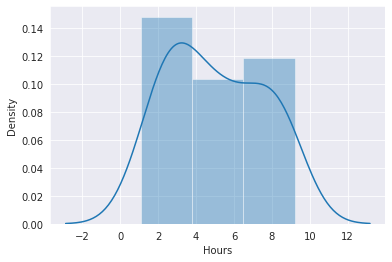

In [ ]:
sns.distplot(df['Hours']) # Distritution of Hours col


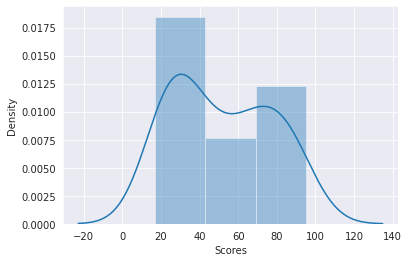

In [ ]:
sns.distplot(df['Scores'])


In [ ]:
# To find the unique values of Hours
df['Hours'].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [ ]:
# To find the unique values of Scores
df['Scores'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86])

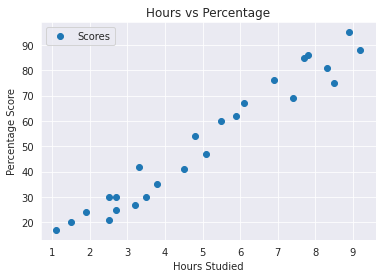

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### To perform linear regression

In [ ]:
# Divide the data into "attributes" (inputs) and "labels" (outputs).
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
# Split this data into training and test sets by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

### Training Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression  # we use linear regression for modelling of data because data is continous.
lr = LinearRegression()  
lr.fit(X_train, y_train) 


LinearRegression()

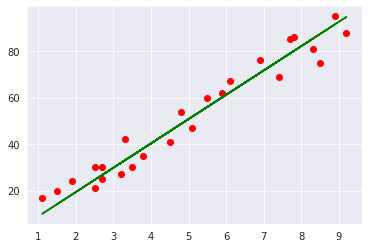

In [ ]:
# Plotting the regression line
m = lr.coef_
c = lr.intercept_
line = m*X + c

# Plotting for the test data
plt.scatter(X, y, c ="r")
plt.plot(X, line, c="g");
plt.show()


In [ ]:
# Making Prediction 
y_pred = lr.predict(X_test) # Predicting the scores


In [ ]:
prediction = pd.DataFrame({'Target': y_test, 'Predicted': y_pred})
prediction

,Target,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


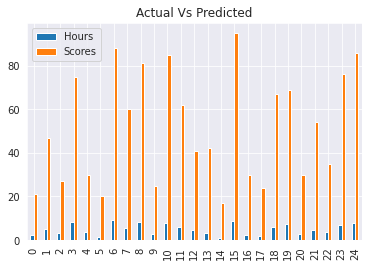

In [ ]:
df.plot(kind='bar')
plt.title("Actual Vs Predicted")
plt.show()


## What would be the predicted score if a students studies for 9.25 hours/day ?


In [ ]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
hours=[[9.25]]
pred_score=lr.predict(hours)
print("Predicted Score is",pred_score)


Predicted Score is [95.22829438]


## Model Evaluation


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('R2 Score:', r2_score(y_test, y_pred))     # we check R^2 for checking goodness of data.

Mean Absolute Error: 7.882398086270432
R2 Score: 0.8421031525243527
